# Add 50% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_a = outliers_utils.outliers_replace(df, 'age', 50)

Outliers found:


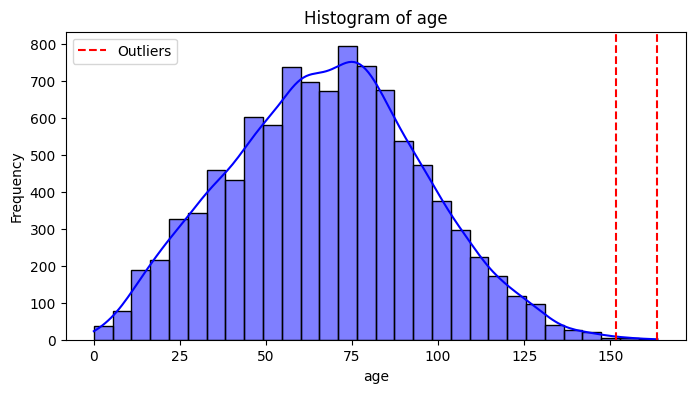

In [5]:
outliers_utils.visualize_outliers_specific(df_a, 'age')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3531
           1       0.96      1.00      0.98      3457

    accuracy                           0.98      6988
   macro avg       0.98      0.98      0.98      6988
weighted avg       0.98      0.98      0.98      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1531
           1       0.93      0.99      0.96      1465

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      0.96      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      4999
           1       0.94      0.99      0.96      4985

    accuracy                           0.96      9984


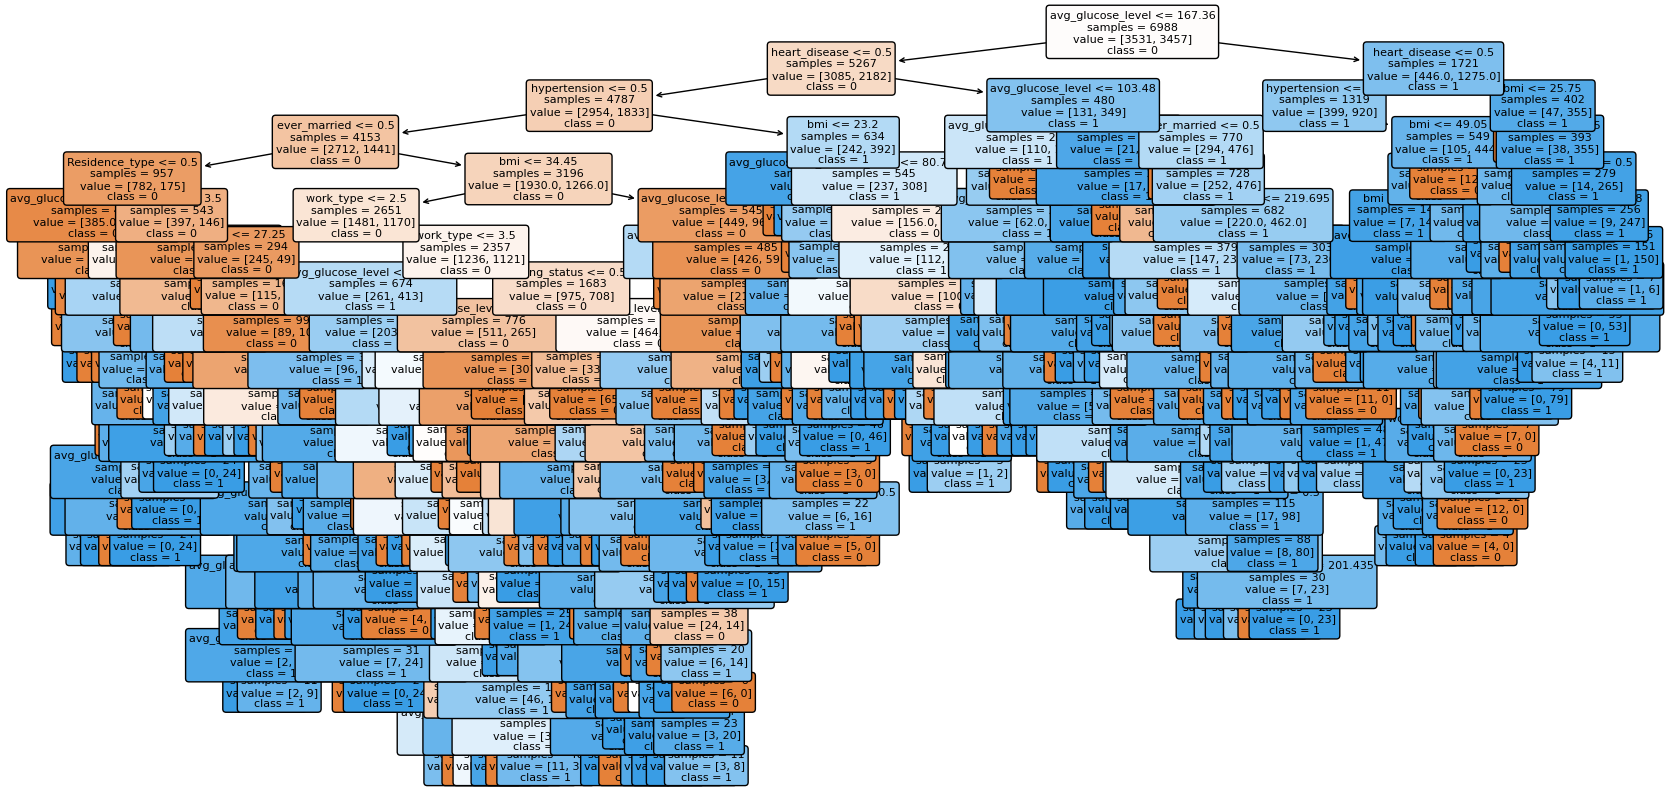

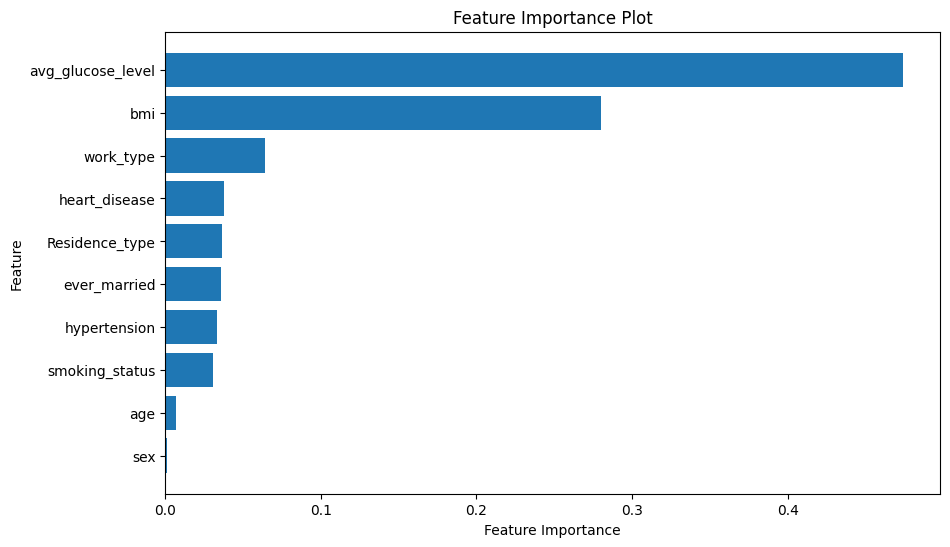

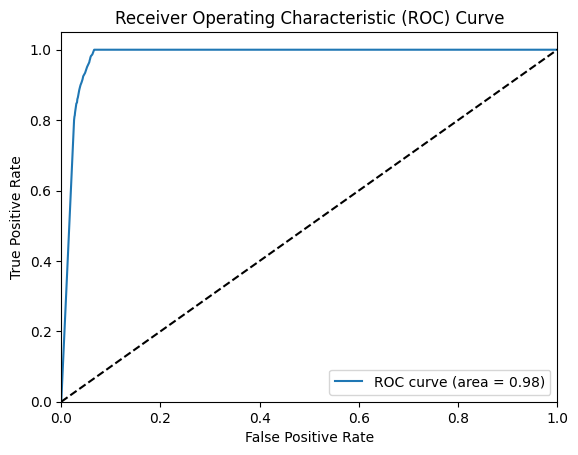

AUC Score: 0.9813235264906542


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9599427753934192, 0.9570815450643777, 0.9556509298998569, 0.949928469241774, 0.9399141630901288, 0.9556509298998569, 0.9527896995708155, 0.9527896995708155, 0.9383954154727794, 0.9426934097421203]
Mean accuracy: 0.9504837036945943
95% confidence interval: (0.9450677379645488, 0.9558996694246399)


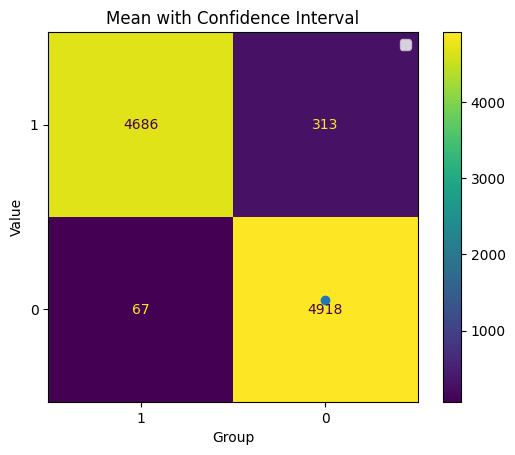

In [6]:
decision_tree = ML_algorithms.train_decision_tree_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_a)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 36.43998861312866
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.3, 'max_depth': 6, 'max_iter': 354, 'min_samples_leaf': 8}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3531
           1       1.00      1.00      1.00      3457

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1531
           1       0.98      1.00      0.99      1465

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996



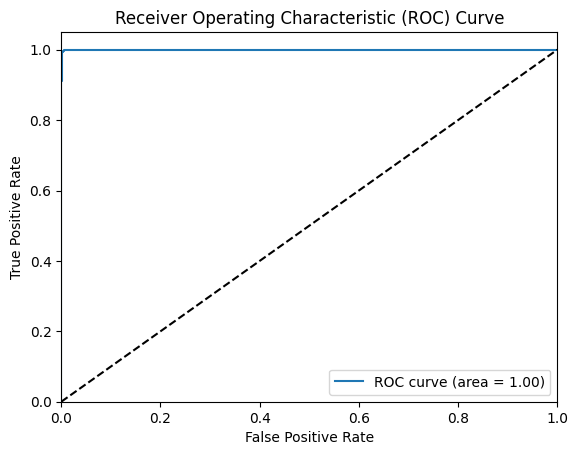

AUC Score: 0.9996686197821311


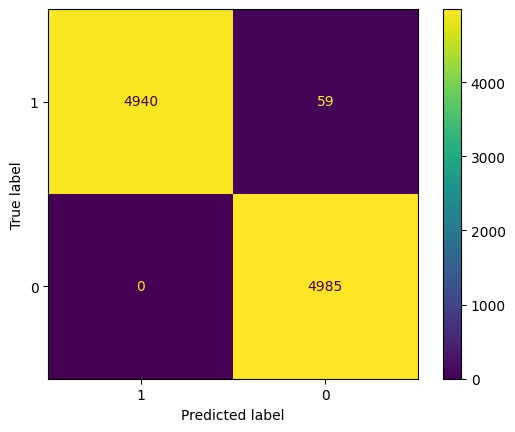

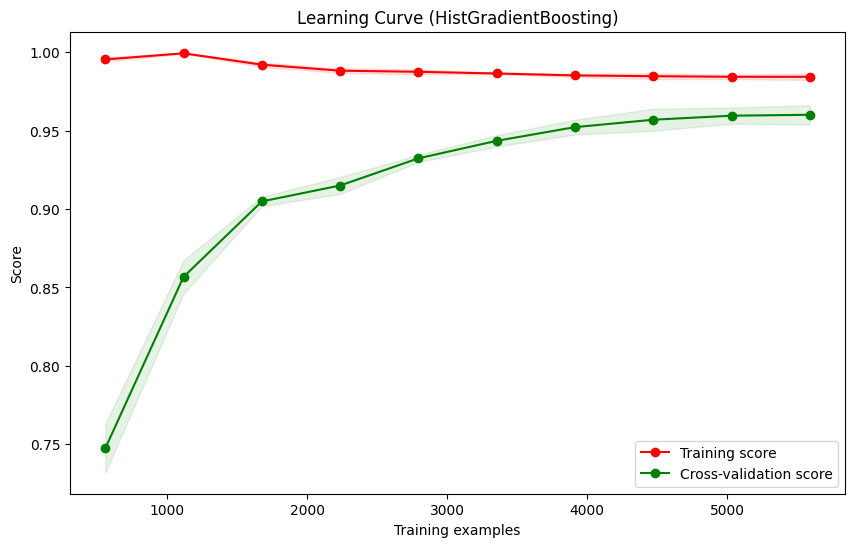

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9842632331902719, 0.9899856938483548, 0.9856938483547926, 0.9914163090128756, 0.9828326180257511, 0.994277539341917, 0.9971387696709585, 0.9871244635193133, 0.9928366762177651, 0.995702005730659]
Mean accuracy: 0.9901271156912659
95% confidence interval: (0.9865682037941573, 0.9936860275883744)


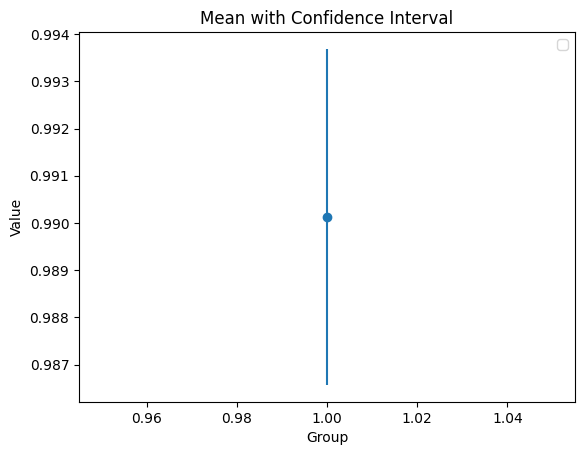

--------------------------------------


In [7]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_a)

print('--------------------------------------')

## avg_glucose_level

In [8]:
df = df_original.copy()

In [9]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [10]:
df_g = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)

Outliers found:


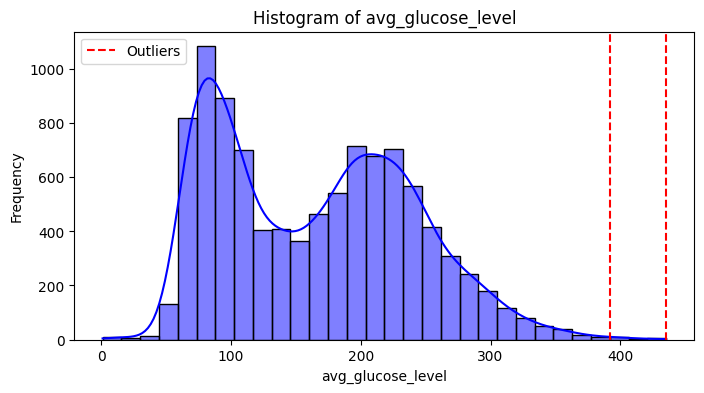

In [11]:
outliers_utils.visualize_outliers_specific(df_g, 'avg_glucose_level')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3480
           1       0.93      0.95      0.94      3508

    accuracy                           0.94      6988
   macro avg       0.94      0.94      0.94      6988
weighted avg       0.94      0.94      0.94      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1543
           1       0.87      0.92      0.89      1453

    accuracy                           0.89      2996
   macro avg       0.90      0.90      0.89      2996
weighted avg       0.90      0.89      0.89      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      4999
           1       0.91      0.97      0.94      4985

    accuracy                           0.94      9984


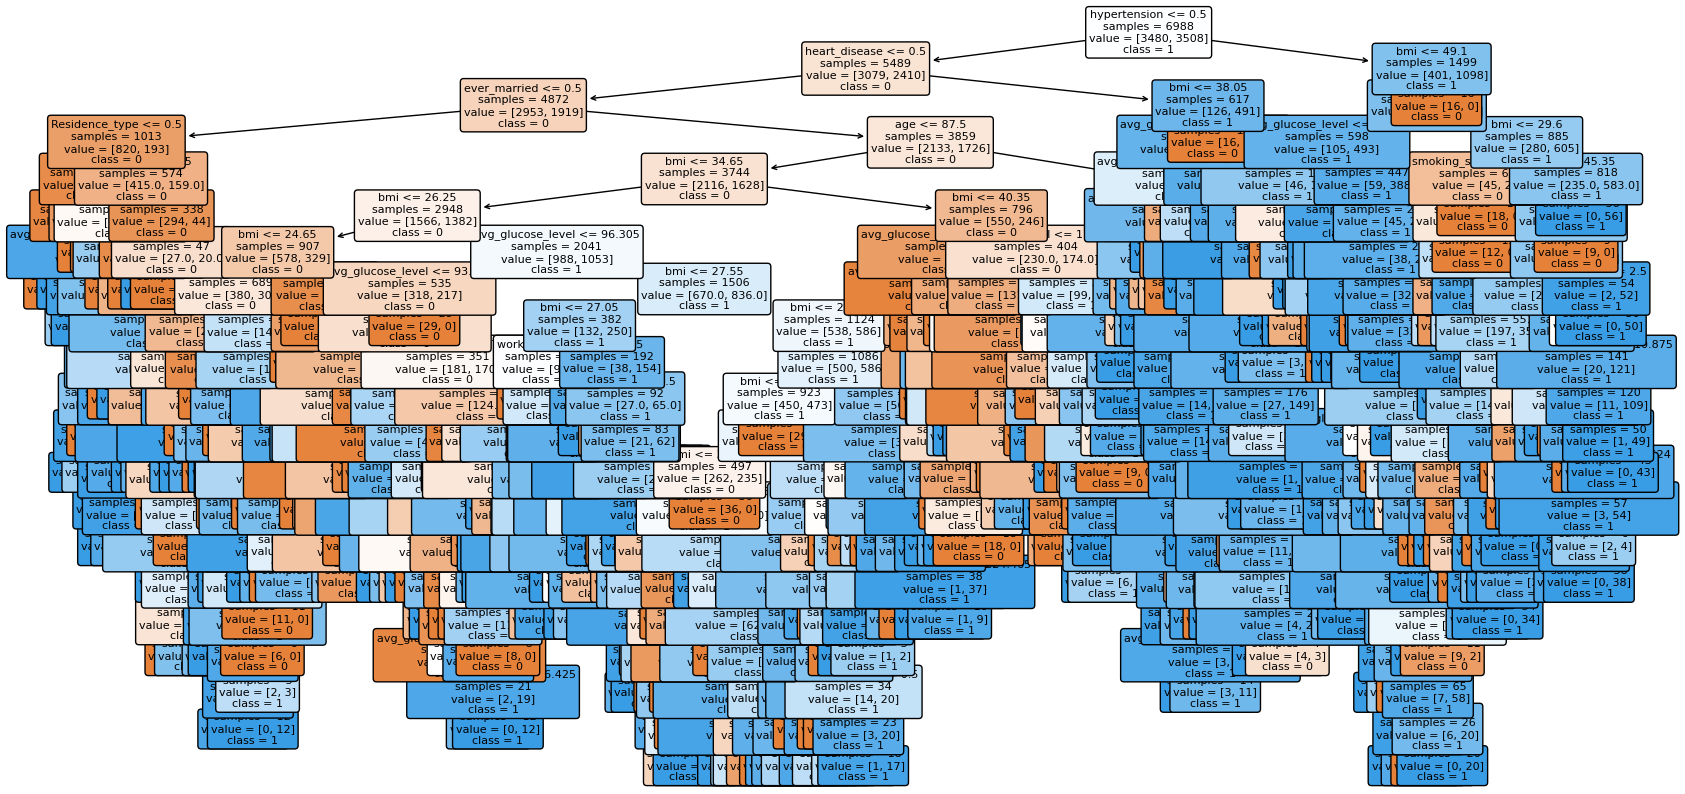

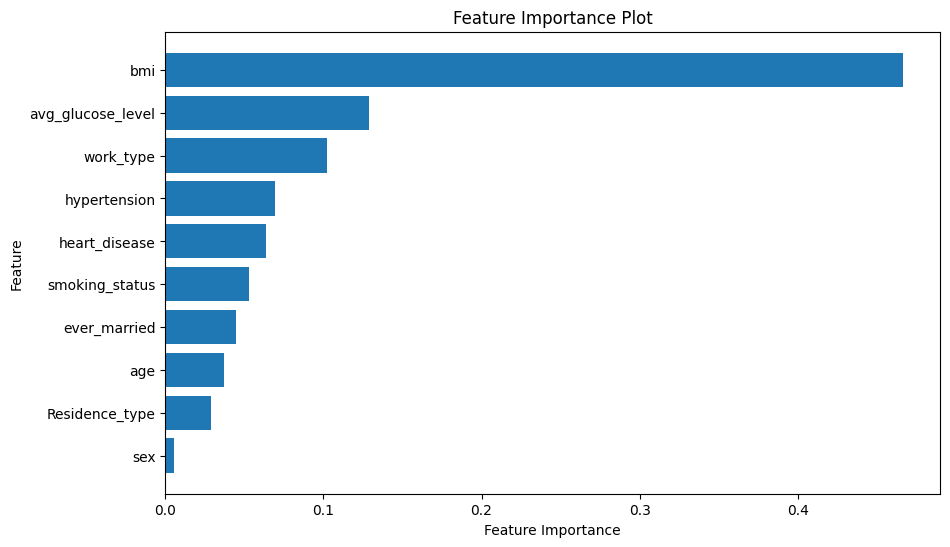

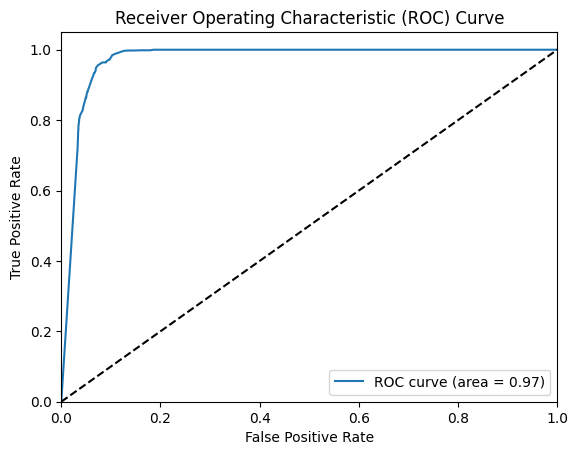

AUC Score: 0.9726090654439815


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8698140200286123, 0.8626609442060086, 0.871244635193133, 0.8683834048640916, 0.8884120171673819, 0.8469241773962805, 0.8669527896995708, 0.8855507868383404, 0.8810888252148997, 0.8638968481375359]
Mean accuracy: 0.8704928448745856
95% confidence interval: (0.8617691111611703, 0.8792165785880008)


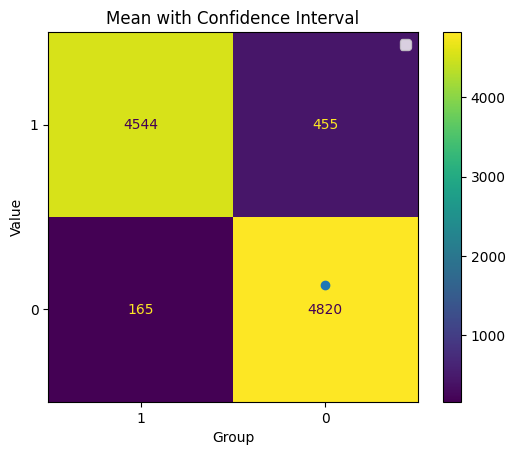

In [12]:
decision_tree = ML_algorithms.train_decision_tree_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_g)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 38.6968092918396
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.2, 'max_depth': 8, 'max_iter': 401, 'min_samples_leaf': 2}
Best score on training data:  0.9672149269866817
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3480
           1       1.00      1.00      1.00      3508

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1543
           1       0.94      0.98      0.96      1453

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      0.

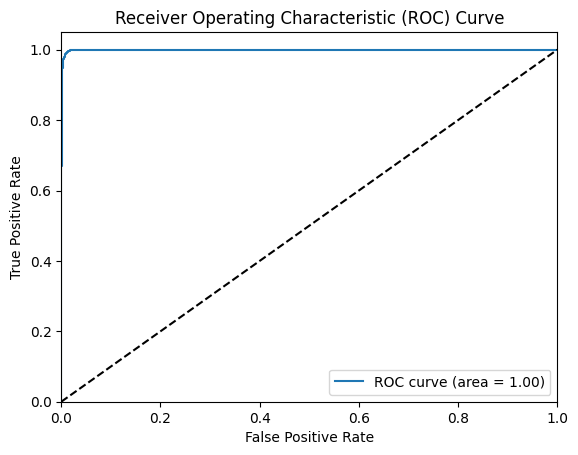

AUC Score: 0.9990849925250848


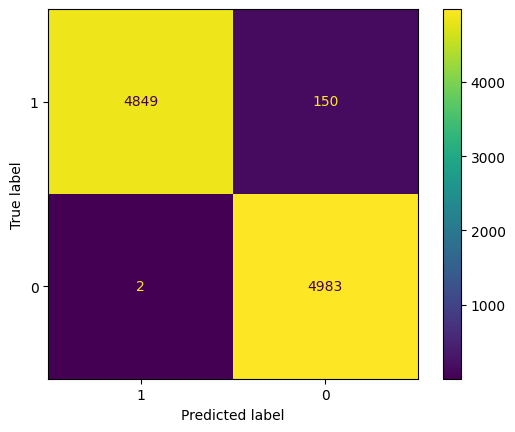

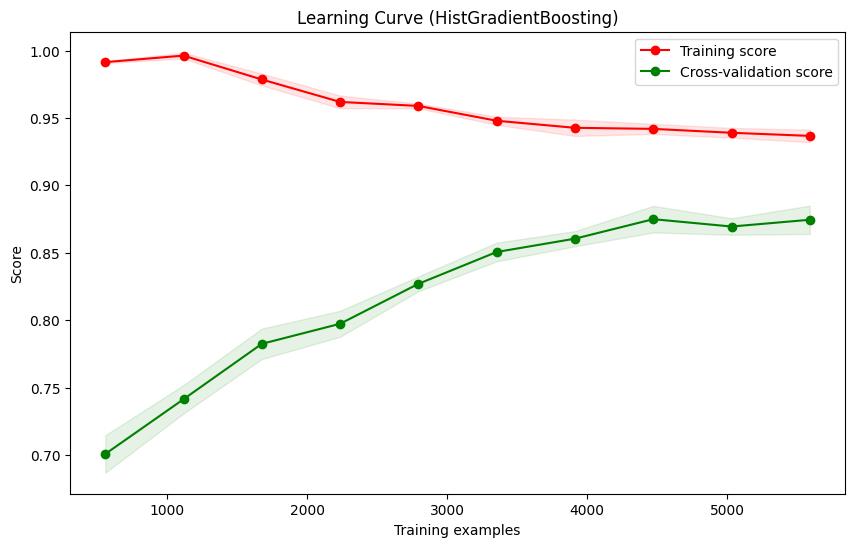

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9527896995708155, 0.9513590844062947, 0.9413447782546495, 0.9484978540772532, 0.949928469241774, 0.9513590844062947, 0.9256080114449213, 0.9470672389127325, 0.9455587392550143, 0.9412607449856734]
Mean accuracy: 0.9454773704555424
95% confidence interval: (0.9397160013450331, 0.9512387395660516)


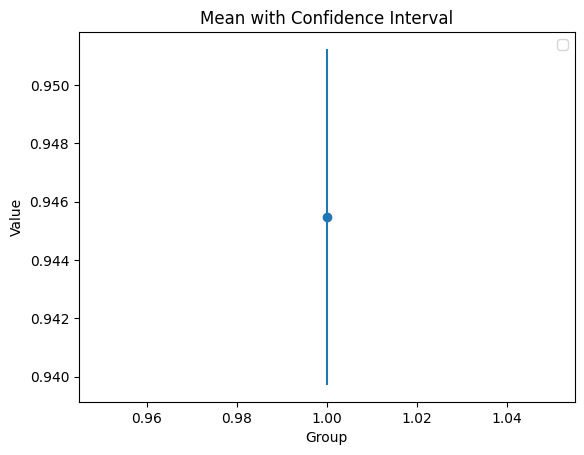

--------------------------------------


In [13]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_g)

print('--------------------------------------')

## bmi

In [14]:
df = df_original.copy()

--------------------------------------
Outliers found:


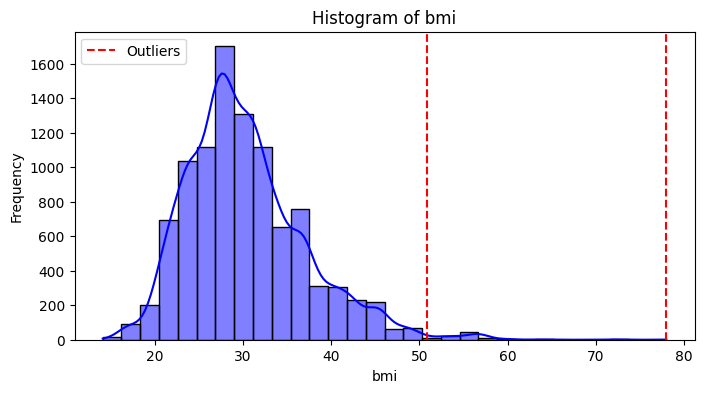

In [15]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [16]:
df_b = outliers_utils.outliers_replace(df, 'bmi', 50)

Outliers found:


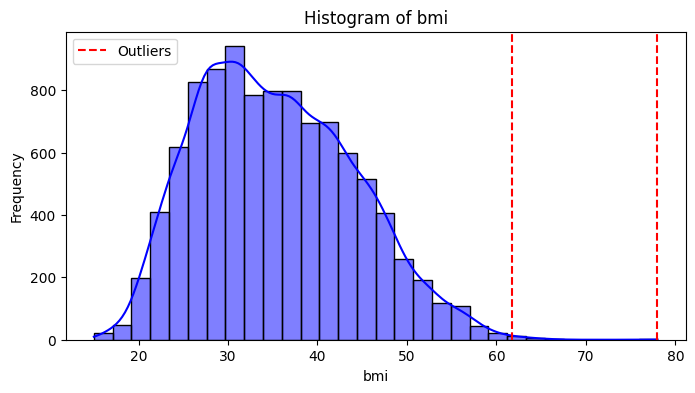

In [17]:
outliers_utils.visualize_outliers_specific(df_b, 'bmi')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3477
           1       0.93      0.95      0.94      3511

    accuracy                           0.94      6988
   macro avg       0.94      0.94      0.94      6988
weighted avg       0.94      0.94      0.94      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1447
           1       0.87      0.93      0.90      1549

    accuracy                           0.89      2996
   macro avg       0.89      0.89      0.89      2996
weighted avg       0.89      0.89      0.89      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      4999
           1       0.89      0.96      0.92      4985

    accuracy                           0.92      9984


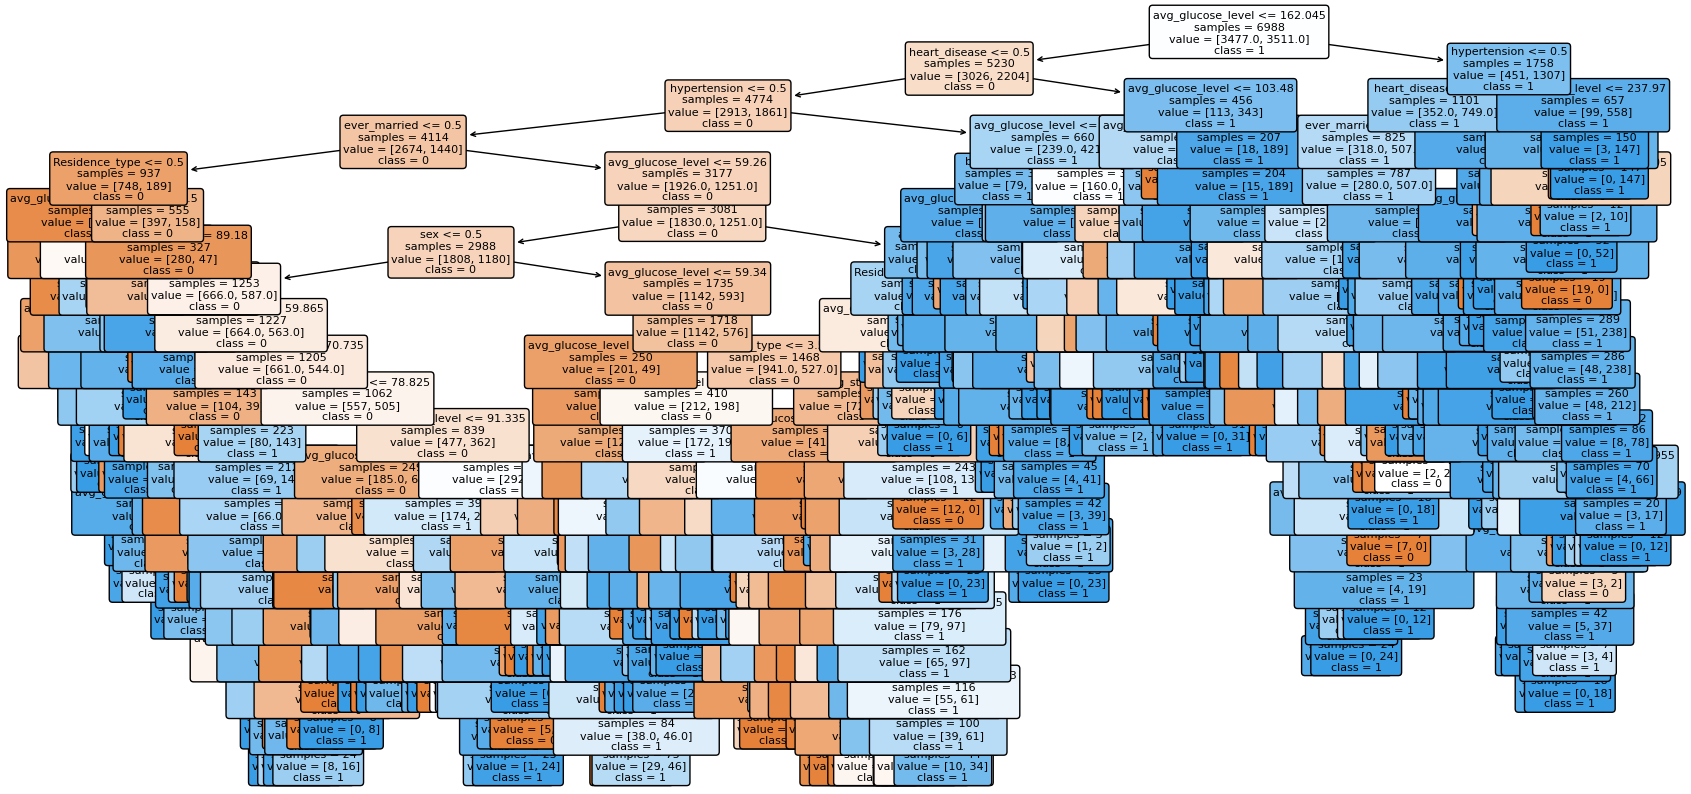

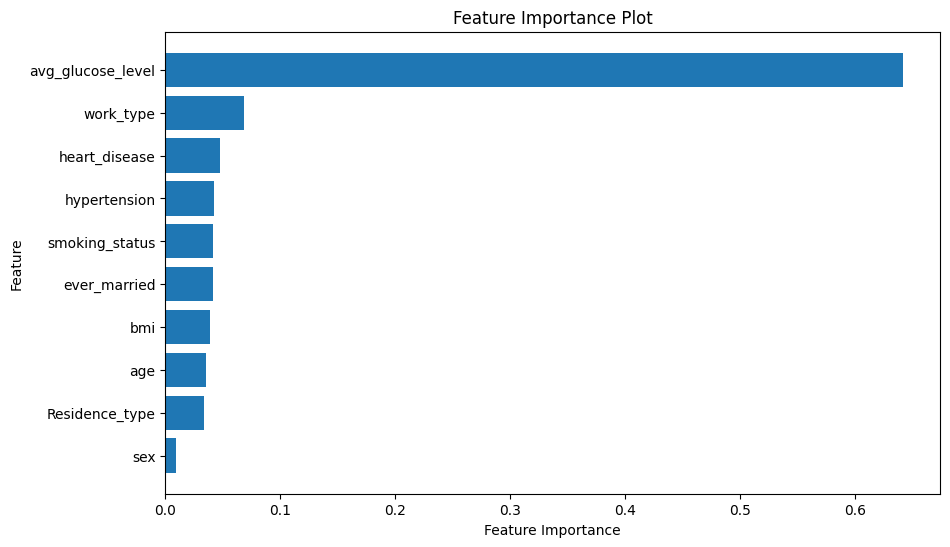

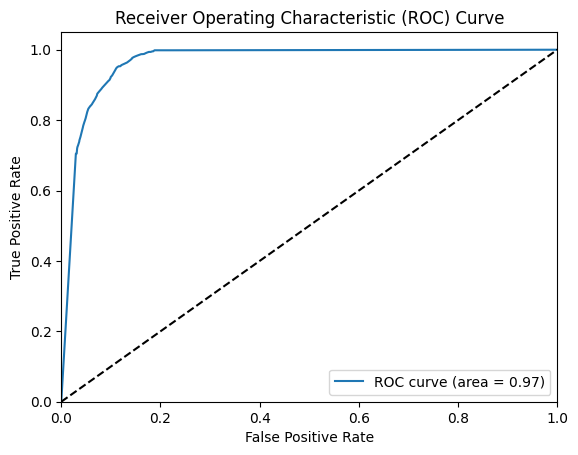

AUC Score: 0.9664650884038393


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8984263233190272, 0.8755364806866953, 0.8841201716738197, 0.9055793991416309, 0.8755364806866953, 0.9170243204577968, 0.8812589413447782, 0.8812589413447782, 0.8681948424068768, 0.8968481375358166]
Mean accuracy: 0.8883784038597915
95% confidence interval: (0.8773324448347848, 0.8994243628847982)


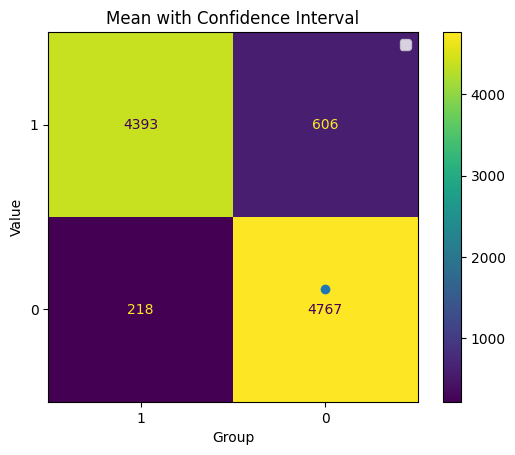

In [18]:
decision_tree = ML_algorithms.train_decision_tree_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_b)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 45.33436584472656
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'max_iter': 494, 'min_samples_leaf': 2}
Best score on training data:  0.9789218368165736
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3477
           1       1.00      1.00      1.00      3511

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1447
           1       0.94      0.99      0.96      1549

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      0

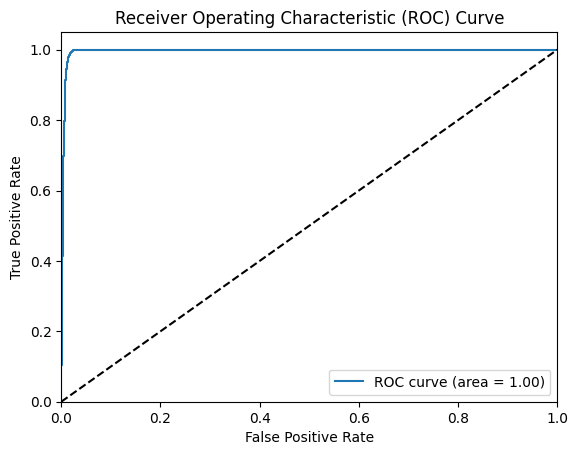

AUC Score: 0.9959971532922431


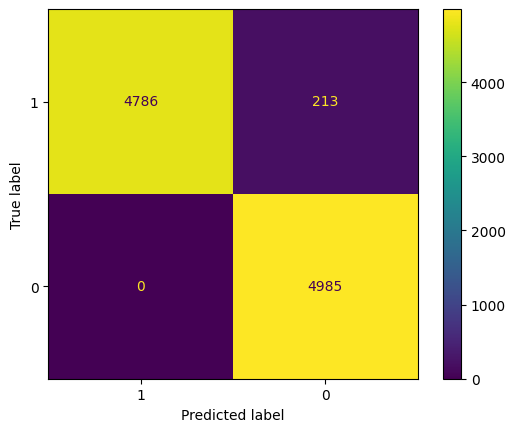

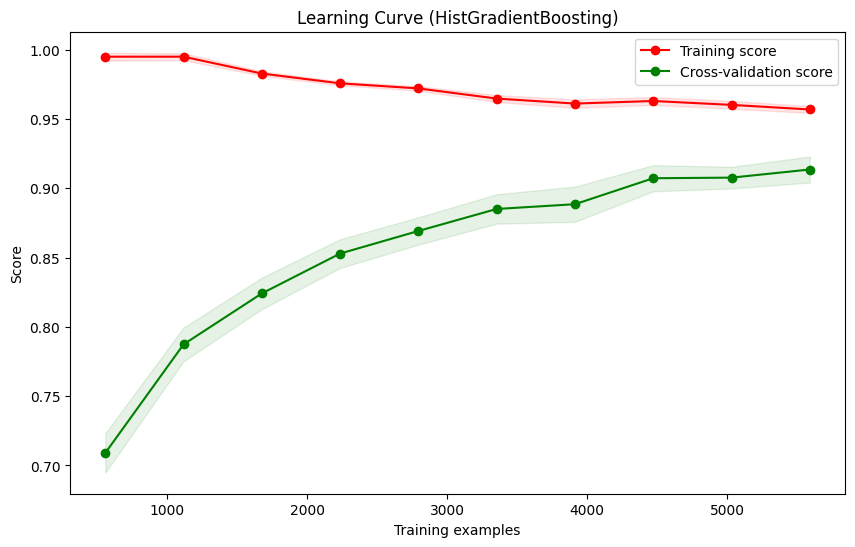

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9642346208869814, 0.9556509298998569, 0.9699570815450643, 0.9656652360515021, 0.9585121602288984, 0.9570815450643777, 0.9570815450643777, 0.9685264663805436, 0.9570200573065902, 0.9641833810888252]
Mean accuracy: 0.9617913023517017
95% confidence interval: (0.9579885529395636, 0.9655940517638398)


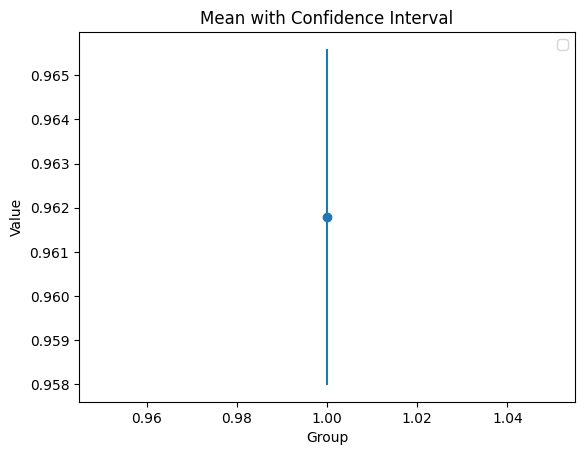

--------------------------------------


In [19]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_b)

print('--------------------------------------')

# Categorical

In [20]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


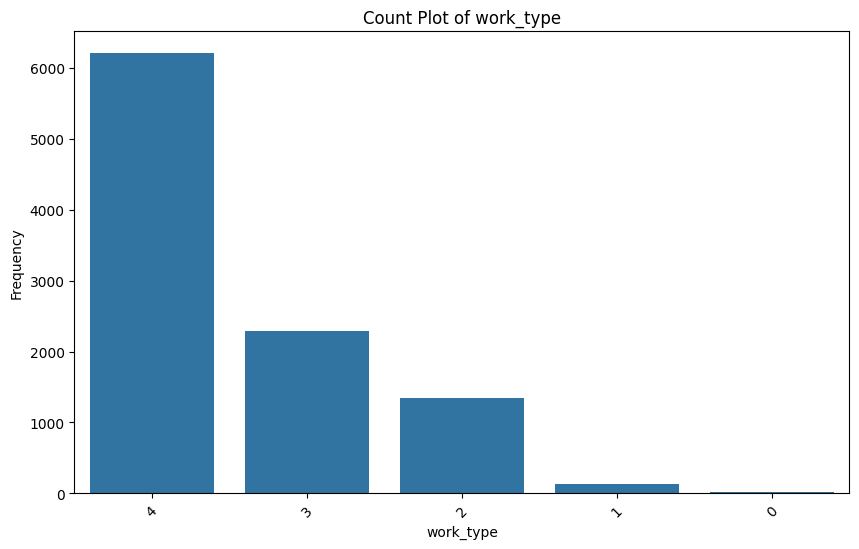

In [21]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [22]:
df_cat = outliers_utils.add_categorical_outliers('work_type', 50, df)

Valore meno frequente:  0


Value counts:
work_type
0    5002
4    3104
3    1129
2     691
1      58
Name: count, dtype: int64
Outliers detected: [0, 4, 3, 2, 1]
Outliers found:


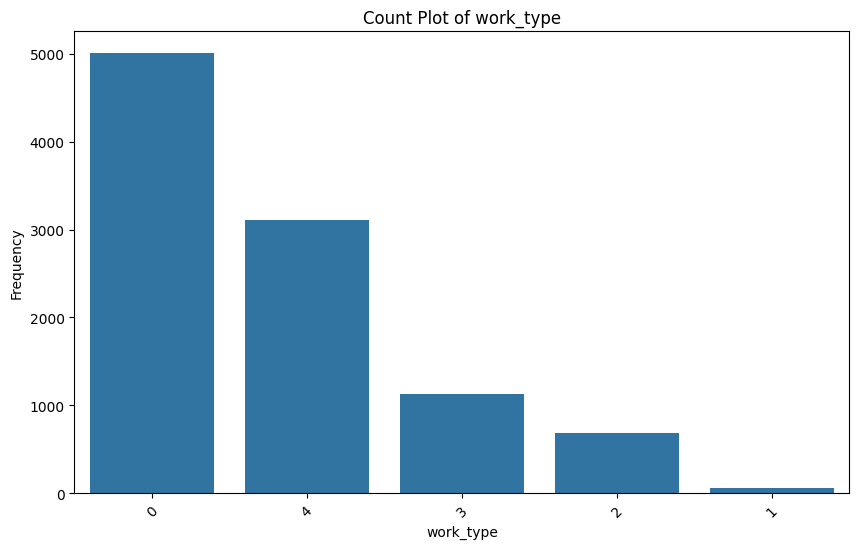

In [23]:
outliers_utils.visualize_outliers_categorical(df_cat, 'work_type')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3458
           1       0.97      0.99      0.98      3530

    accuracy                           0.98      6988
   macro avg       0.98      0.98      0.98      6988
weighted avg       0.98      0.98      0.98      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1541
           1       0.93      0.99      0.96      1455

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      0.96      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4999
           1       0.95      0.98      0.97      4985

    accuracy                           0.97      9984


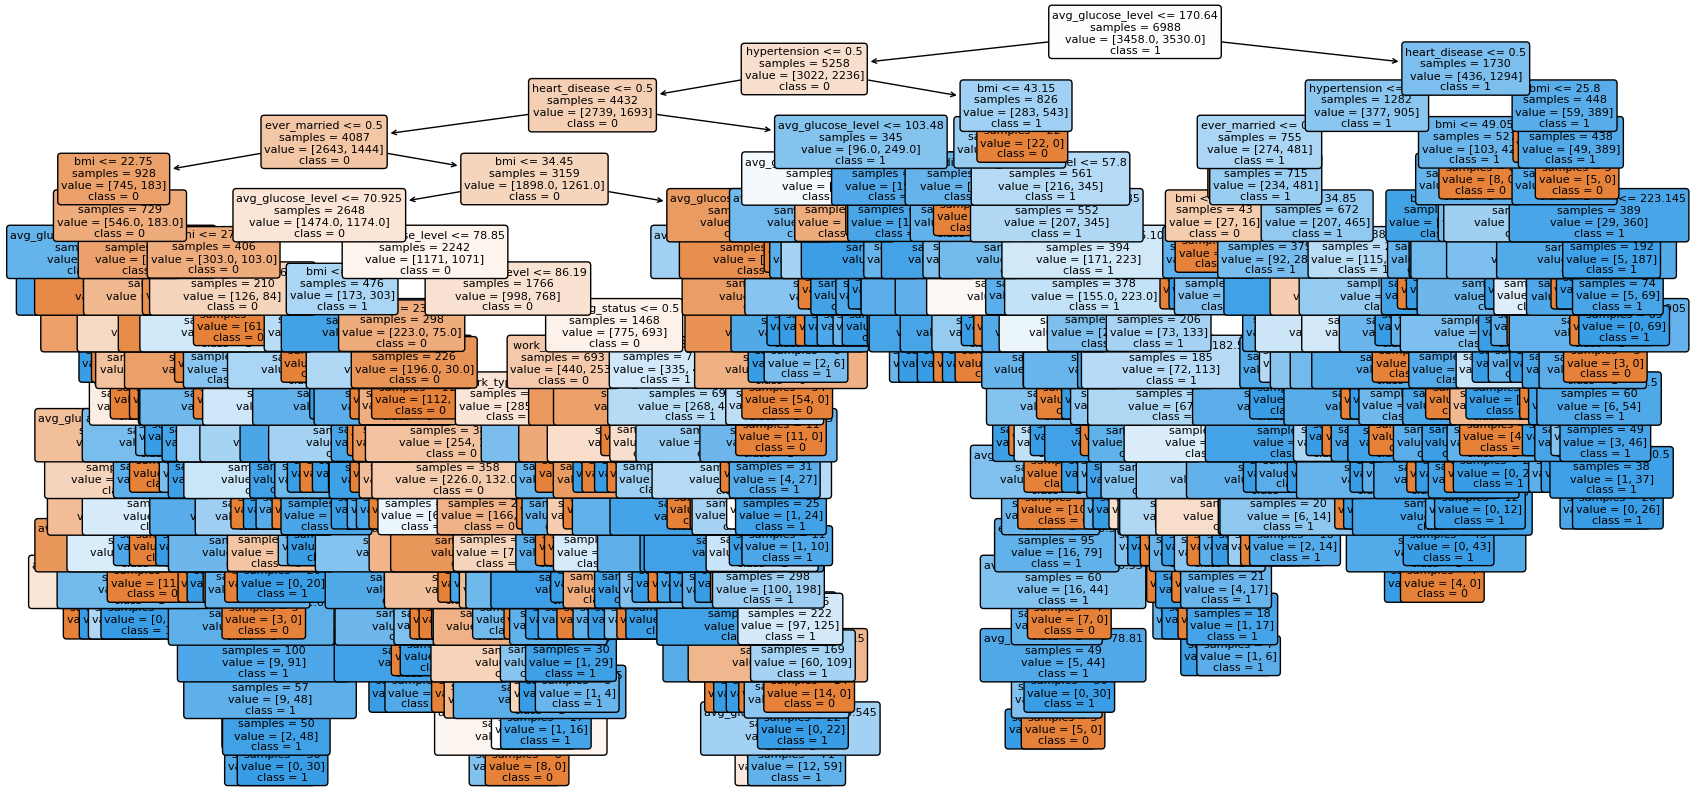

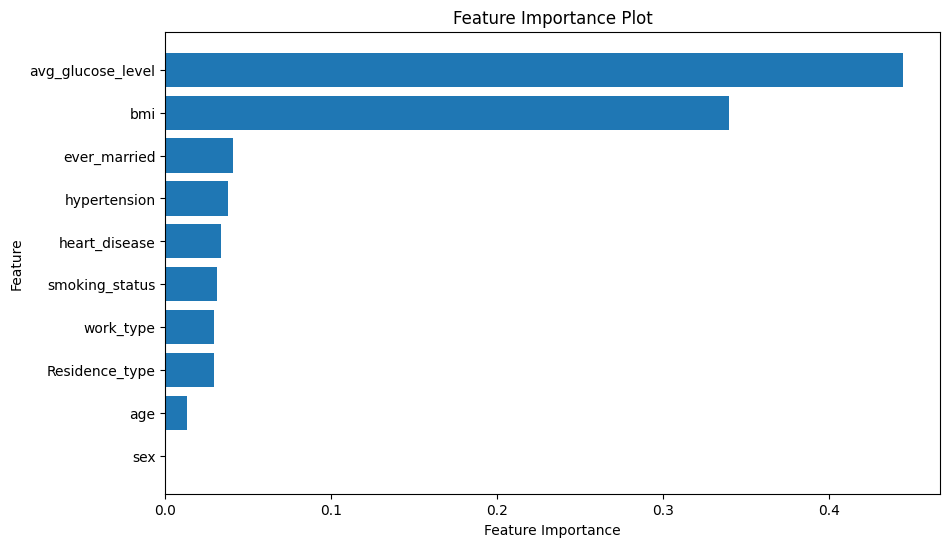

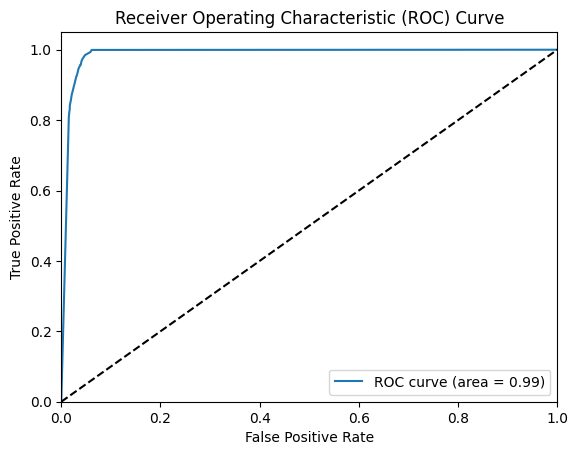

AUC Score: 0.9879445297284131


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9628040057224606, 0.9570815450643777, 0.9613733905579399, 0.9370529327610873, 0.944206008583691, 0.9542203147353362, 0.9599427753934192, 0.9413447782546495, 0.9398280802292264, 0.9498567335243553]
Mean accuracy: 0.9507710564826543
95% confidence interval: (0.9438857379383421, 0.9576563750269664)


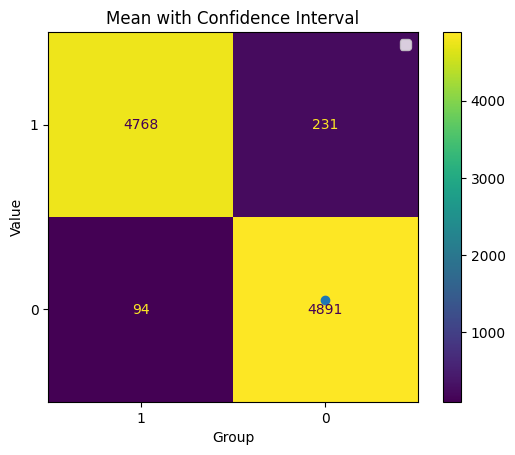

In [24]:
decision_tree = ML_algorithms.train_decision_tree_model(df_cat, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_cat)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 44.11851716041565
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.2, 'max_depth': 6, 'max_iter': 441, 'min_samples_leaf': 2}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3458
           1       1.00      1.00      1.00      3530

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1541
           1       0.99      1.00      0.99      1455

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996



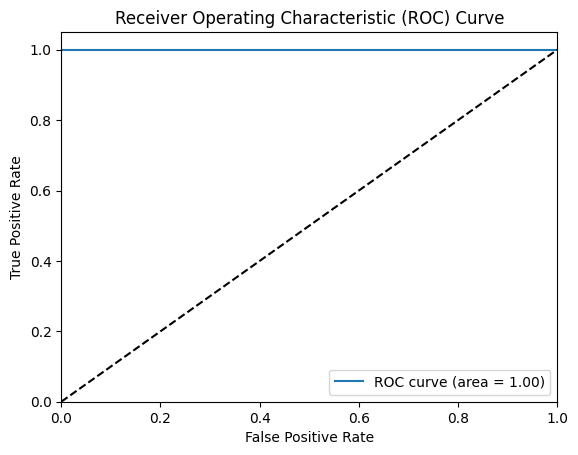

AUC Score: 0.9997625202071507


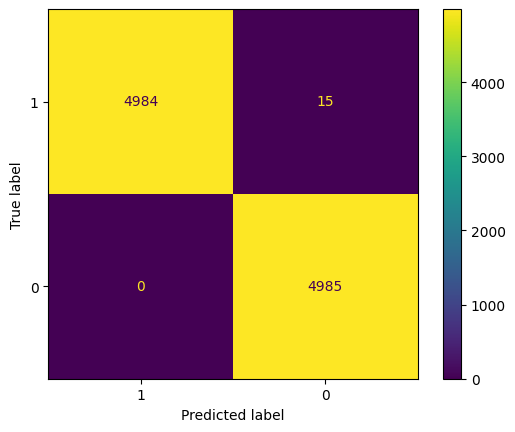

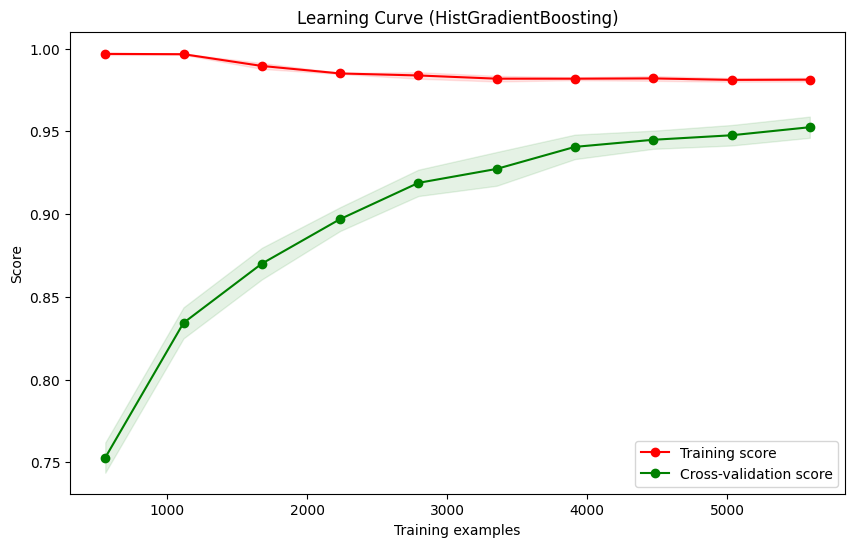

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9928469241773963, 0.9871244635193133, 0.9885550786838341, 0.9971387696709585, 0.9928469241773963, 0.9928469241773963, 0.9842632331902719, 0.9899856938483548, 0.9842406876790831, 0.9899713467048711]
Mean accuracy: 0.9899820045828877
95% confidence interval: (0.9870449591007917, 0.9929190500649836)


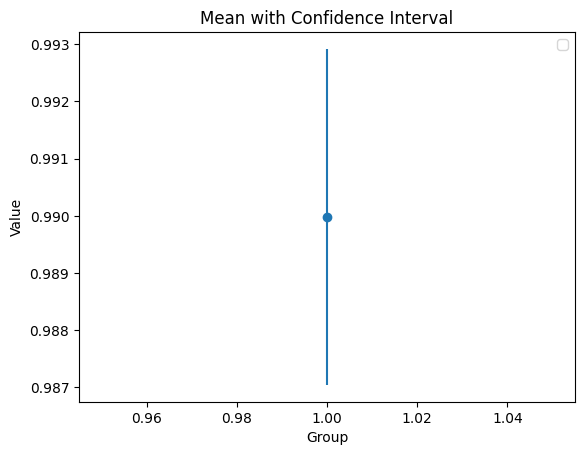

--------------------------------------


In [25]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_cat, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_cat)

print('--------------------------------------')